
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime



In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Read the data


In [5]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 


In [6]:

tsDataWrangling_obj.for_RNN_data_CIVS


,Unnamed: 0,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,1,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,2,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,3,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,4,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,5,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,1379,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,1380,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,1381,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,1382,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0


In [7]:

## tsDataWrangling_obj.cols_list_DF


In [8]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]


In [9]:

tsDataWrangling_obj.for_RNN_data_CIVS


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0



## The Dates Map


In [10]:

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')

tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

tsDataWrangling_obj.df_Dates_Map


,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,CNUM,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,2.0,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,6.0,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,7.0,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,8.0,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,9.0,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.762500,2021-12-31 13:10:00,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,4344.0,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,0.646000,2021-12-31 14:41:00,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,4345.0,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,0.654667,2021-12-31 16:15:00,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,4346.0,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,0.591667,2021-12-31 17:40:00,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,4347.0,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0



## Plots


In [11]:

## tsDataWrangling_obj.data_plot_all_columns()


In [12]:

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 


(1383, 25)
(1383, 27)


In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0


In [14]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()


In [15]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0


In [16]:

tsDataWrangling_obj.calculateDeltas()


In [17]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS


,delta_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,0.000000,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,-0.044380,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,0.009040,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,0.101686,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.109500,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,-0.116500,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,0.008667,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,-0.063000,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0


In [18]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]


In [19]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS


,delta_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,0.000000,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,-0.044380,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,0.009040,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,0.101686,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.109500,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,-0.116500,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,0.008667,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,-0.063000,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0


In [20]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [21]:

tsDataWrangling_obj.calculateMovingAverage()


In [22]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,0.000000,0.000000,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,-0.044380,0.000000,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,0.009040,0.000000,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,0.101686,0.000000,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.109500,0.004444,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,-0.116500,0.008900,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,0.008667,-0.037618,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,-0.063000,-0.014340,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0


In [23]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [24]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 


In [25]:

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )


In [26]:

def train_model_GPT( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': []}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        loss =  loss_A + loss_B + loss_C 
        #######################################################
        optimizer.zero_grad( set_to_none=True )          
        loss.backward()
        optimizer.step()
        history['loss'].append(      loss.item()  )
        history['loss_A'].append(  loss_A.item()  )
        history['loss_B'].append(  loss_B.item()  )
        history['loss_C'].append(  loss_C.item()  )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        ## remove train_CIVS_tr_scaled  - RC



In [27]:

def function_train_rc(  train_data ):
    si_GPT, history_GPT, x_means, x_standard_devs, data_zh = train_model_GPT( train_data )    
    tsGPT_obj.plot_losses_training( history_GPT )
    return si_GPT, history_GPT, x_means, x_standard_devs, data_zh 



## 000 to 015


0 train loss =  1.2788255214691162
seq length of pred =  15


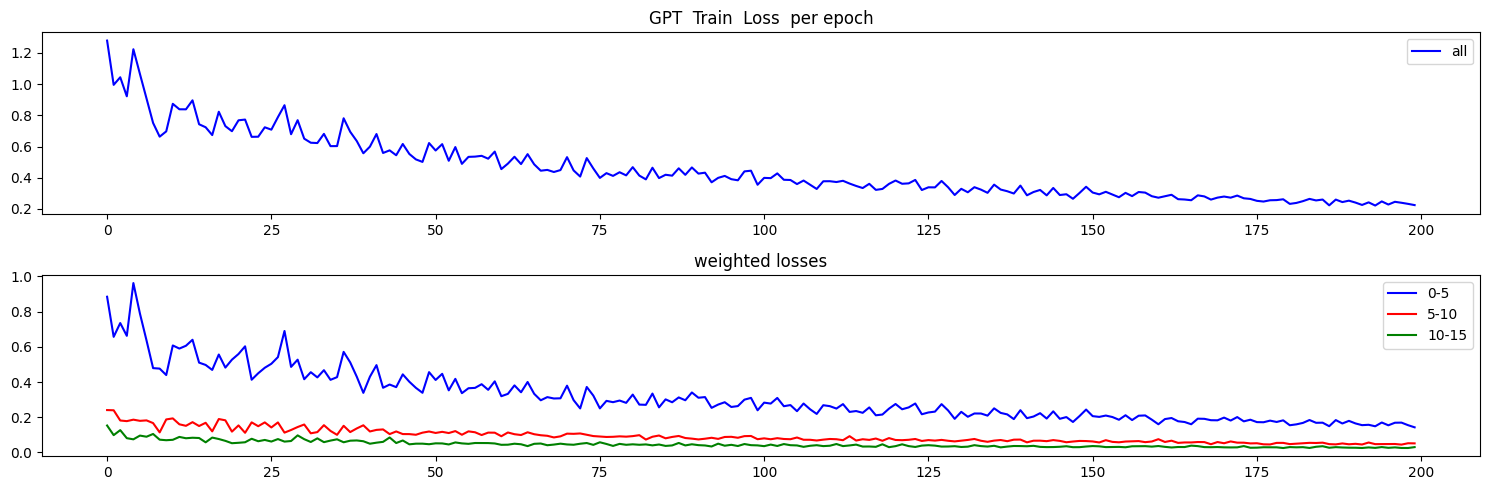

 inference on train set all 105? 
torch.Size([1, 104, 27])
torch.Size([1, 104, 27])
max tokens  101
torch.Size([1, 5, 27])
(104, 27)
(104, 27)


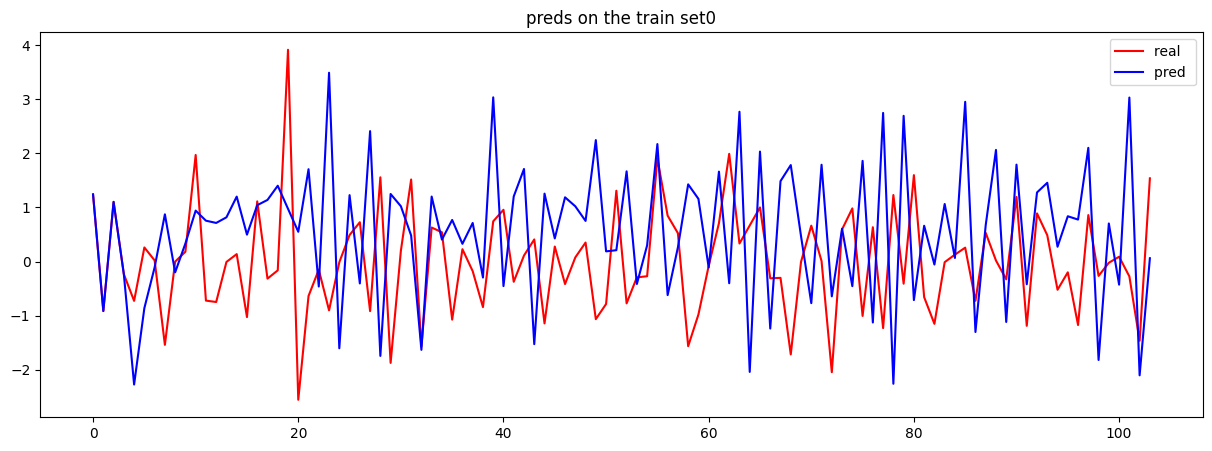

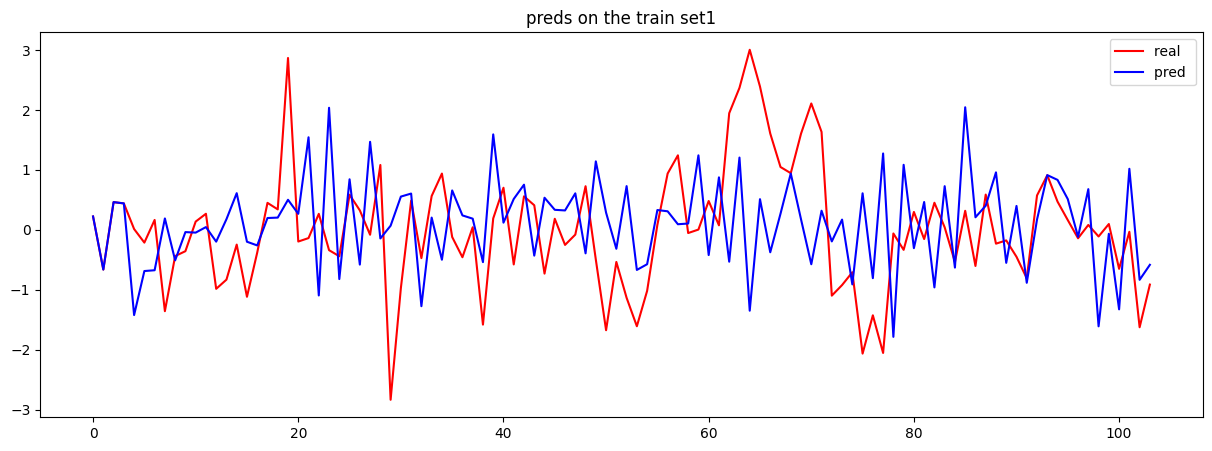

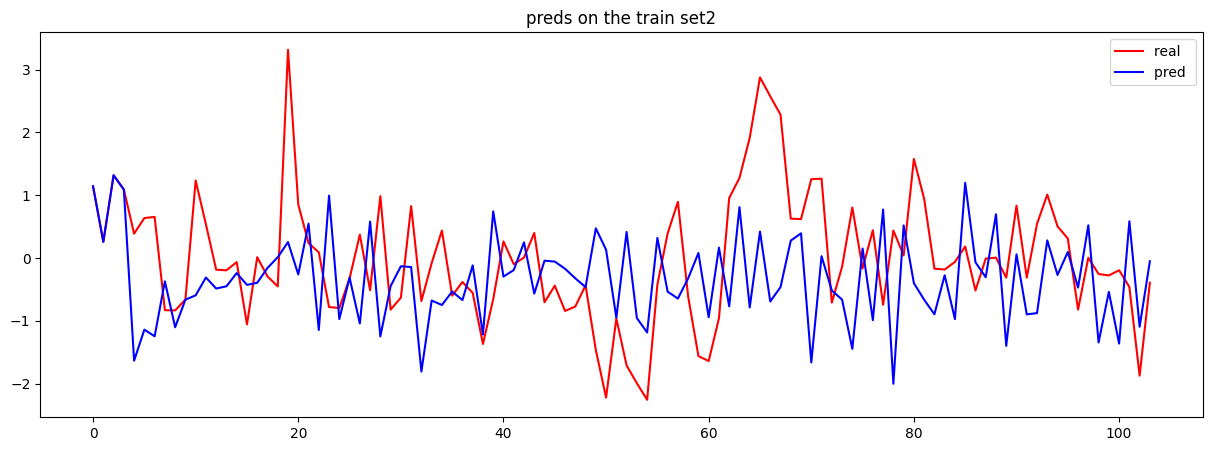

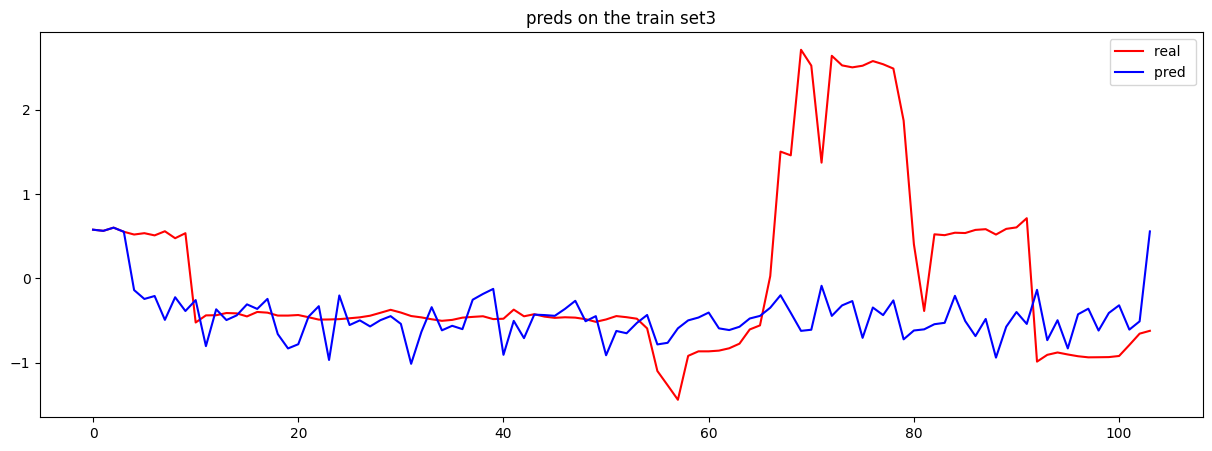

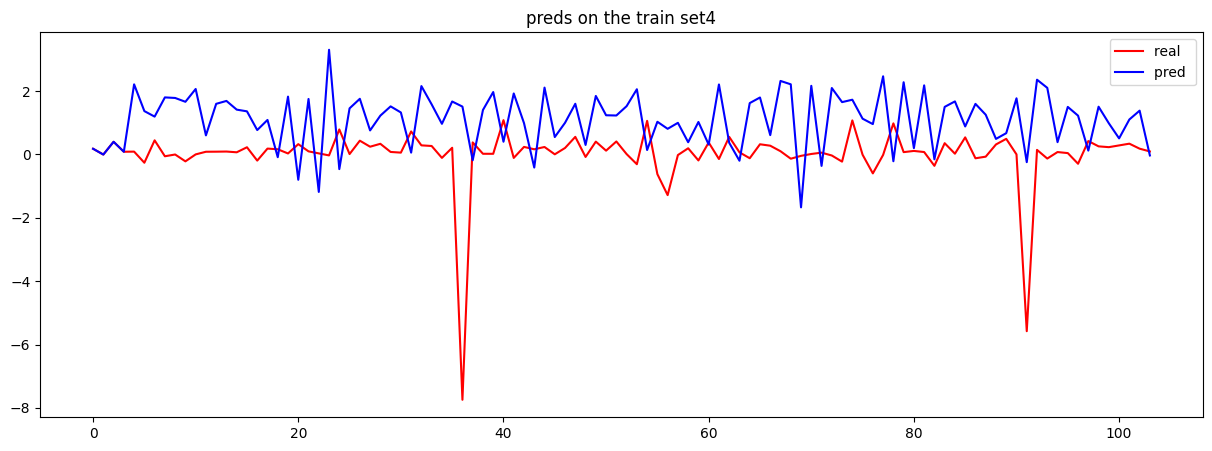

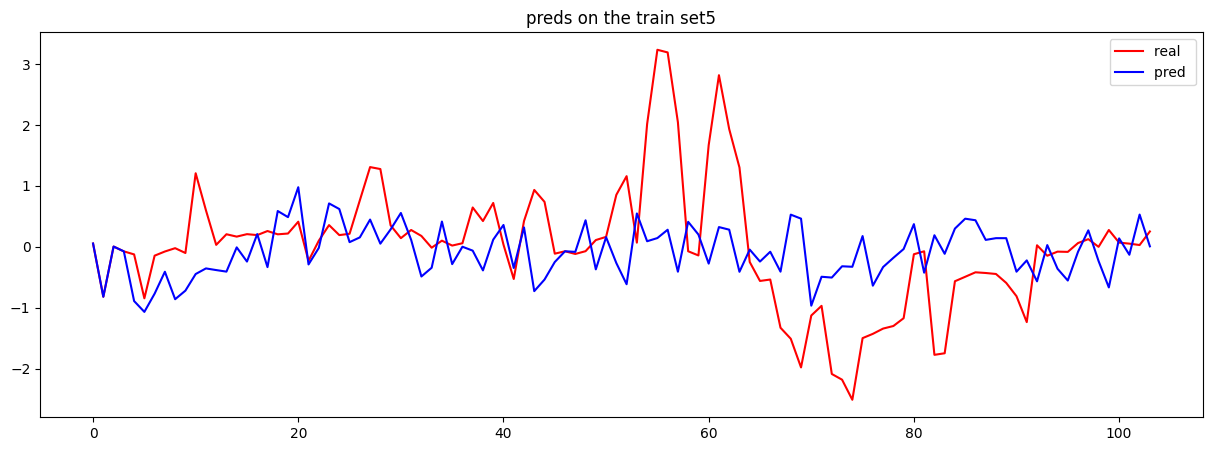

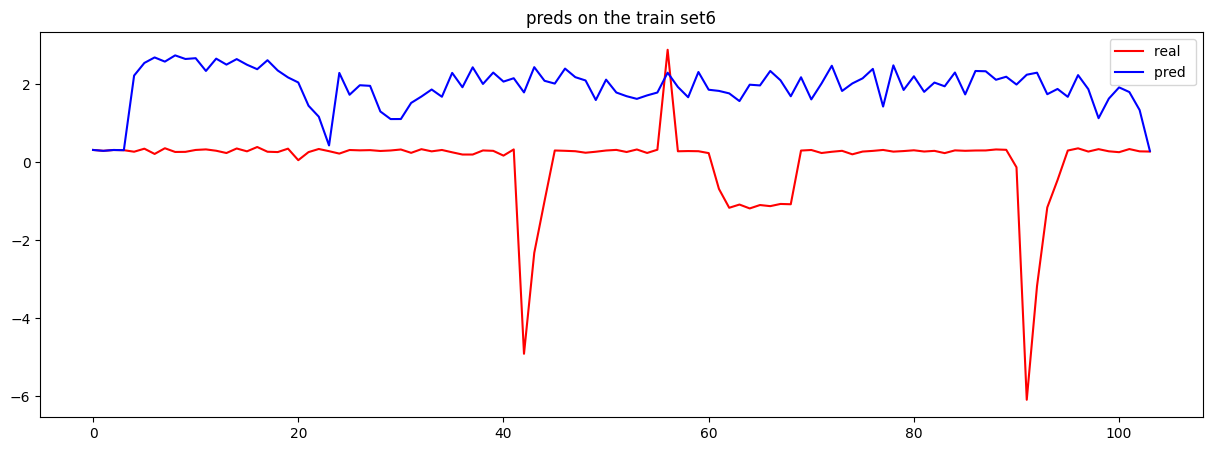

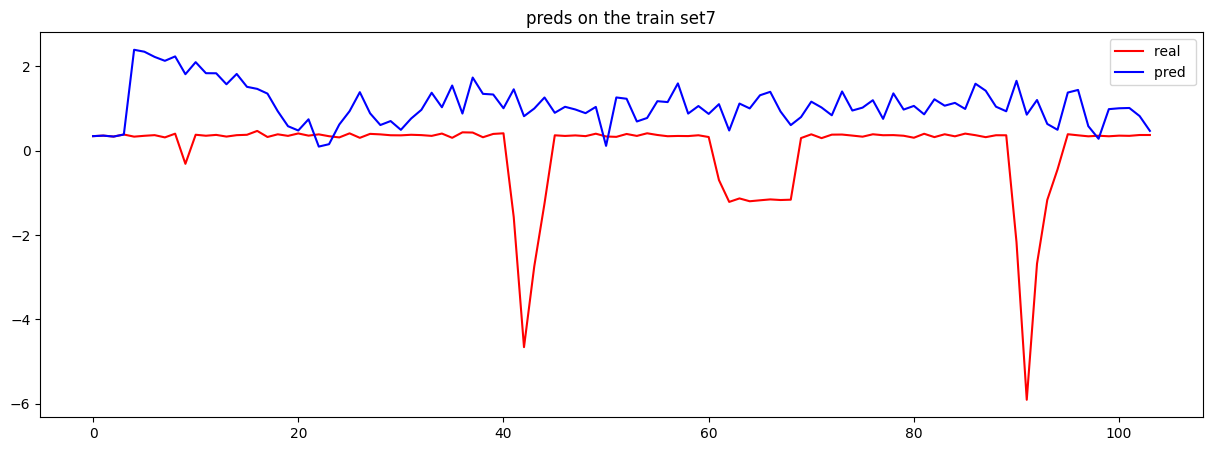

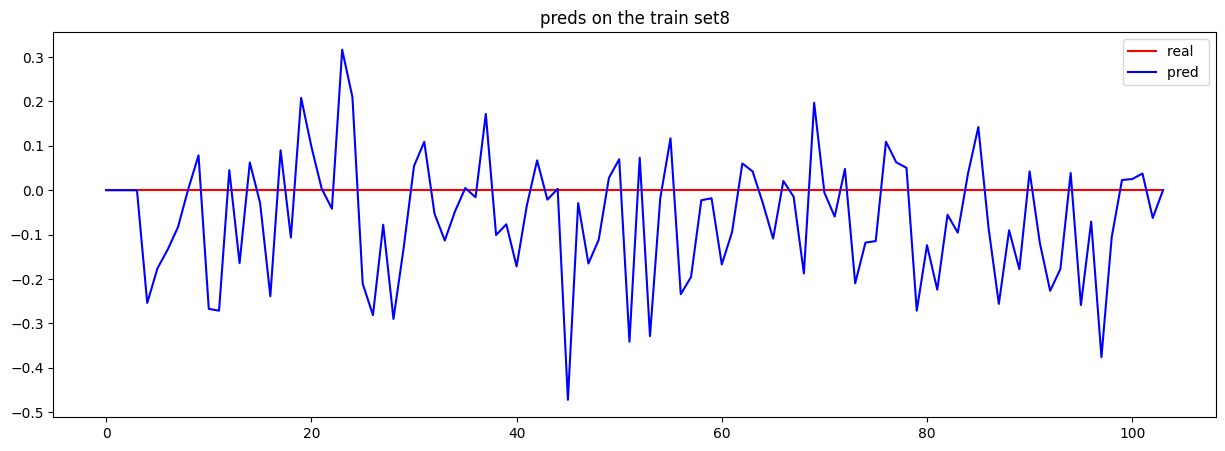

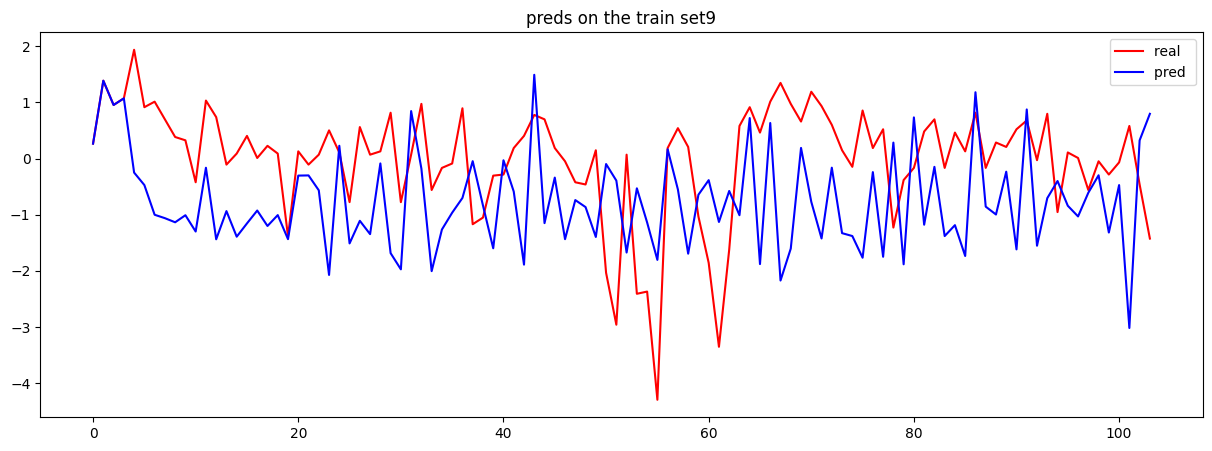

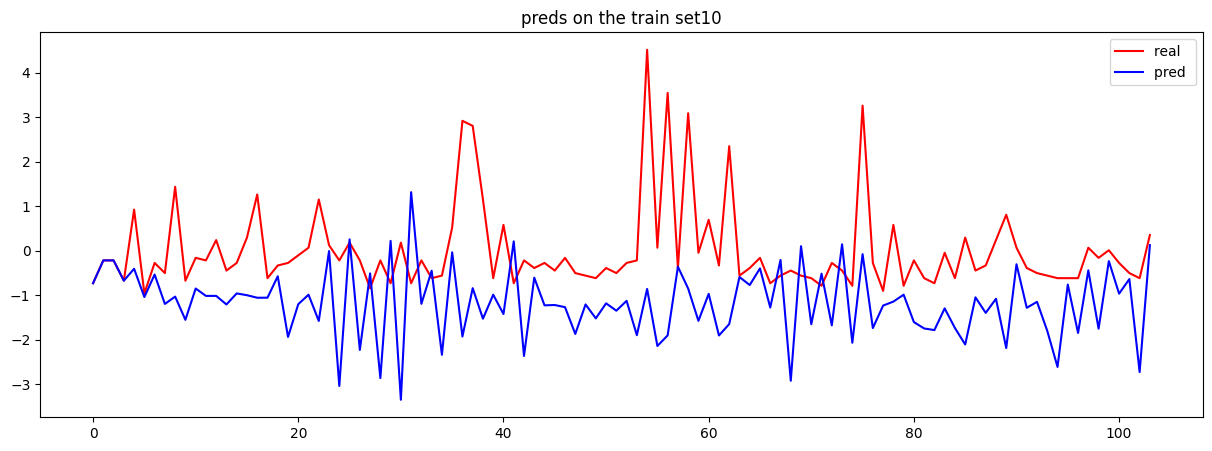

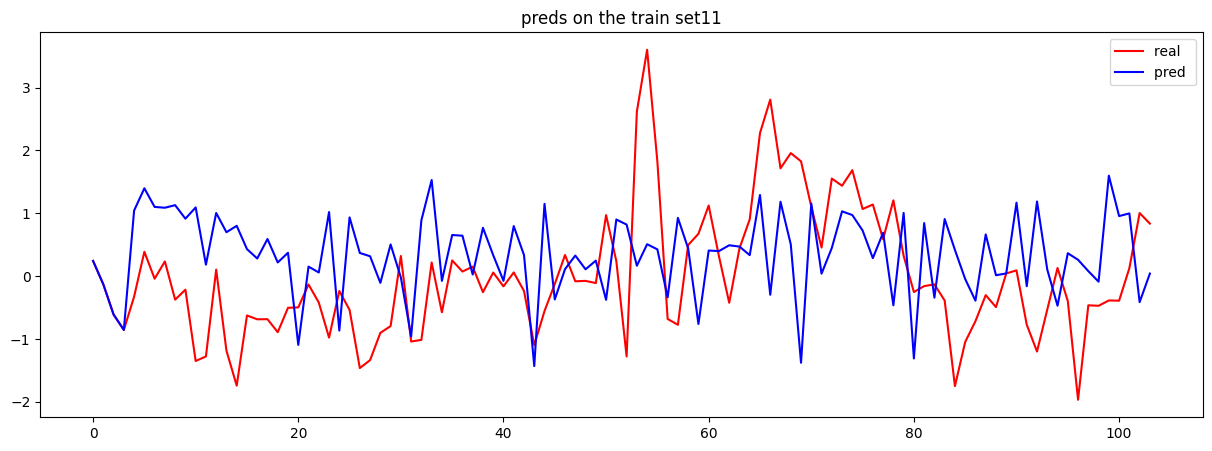

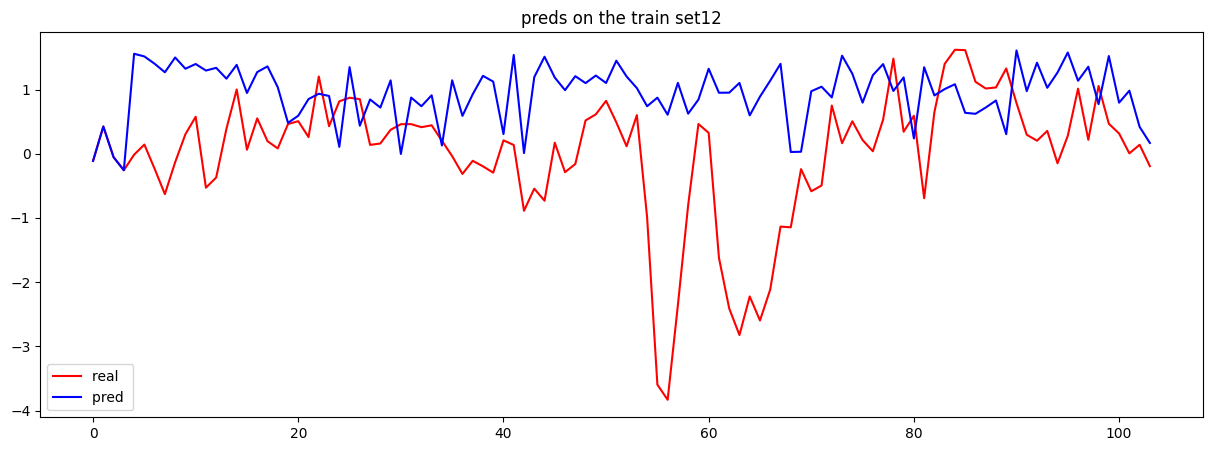

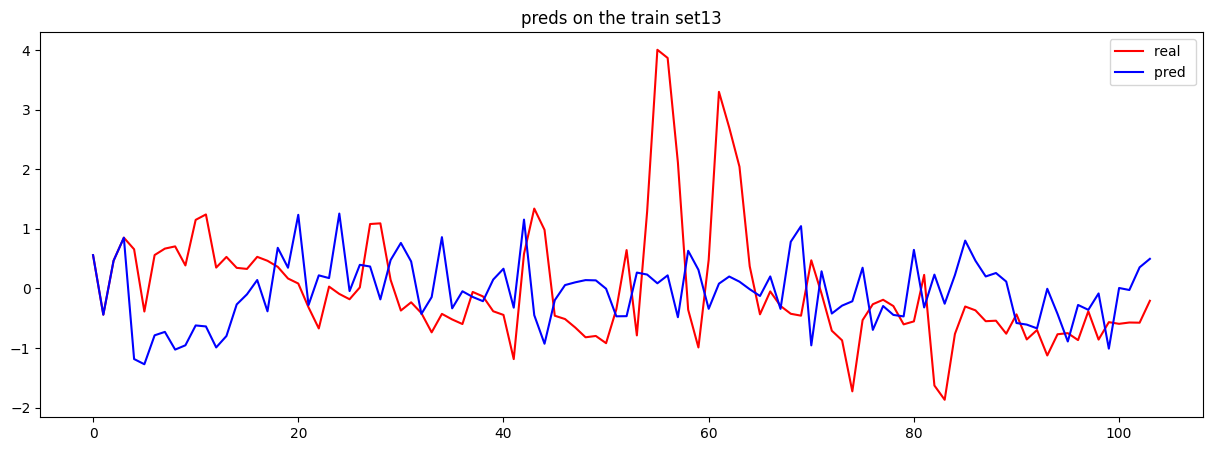

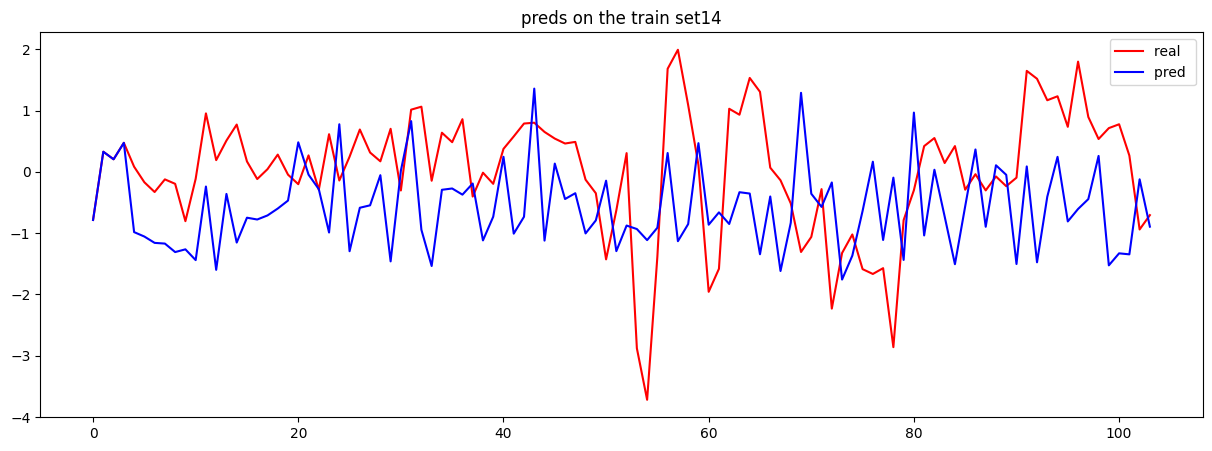

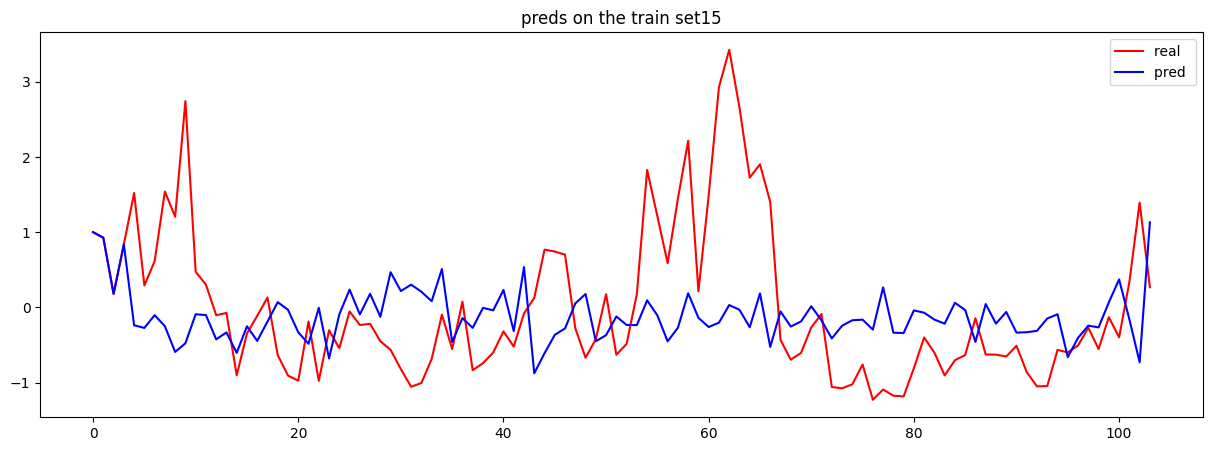

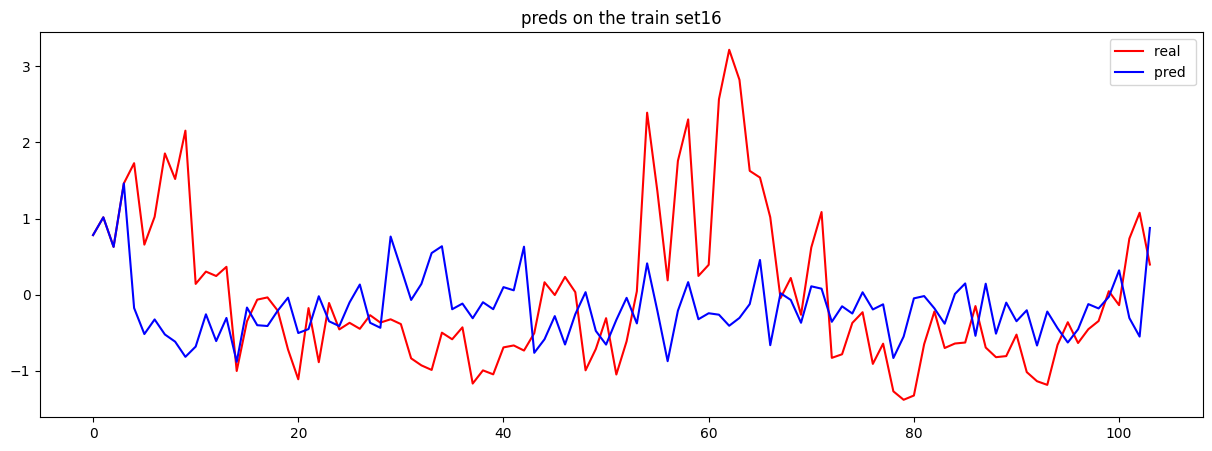

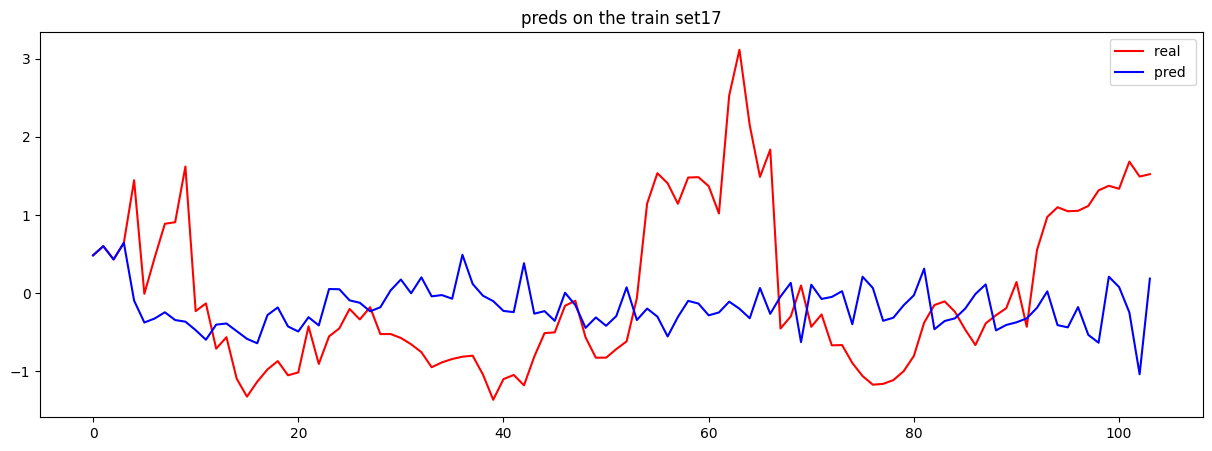

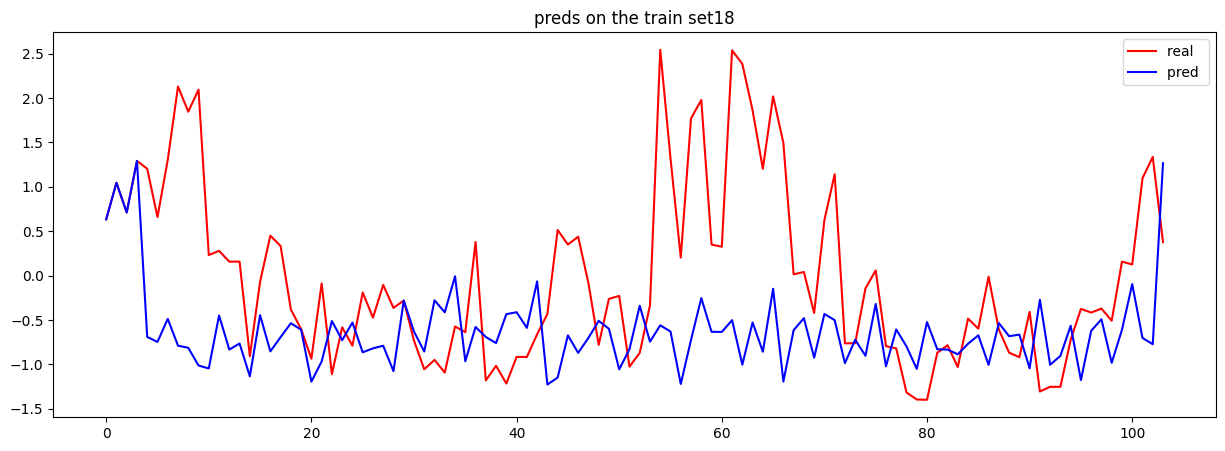

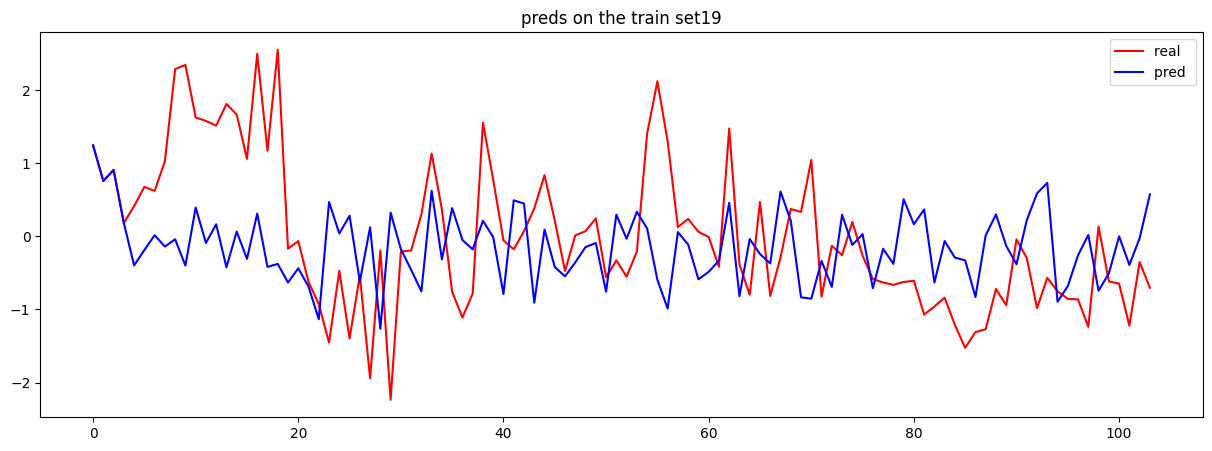

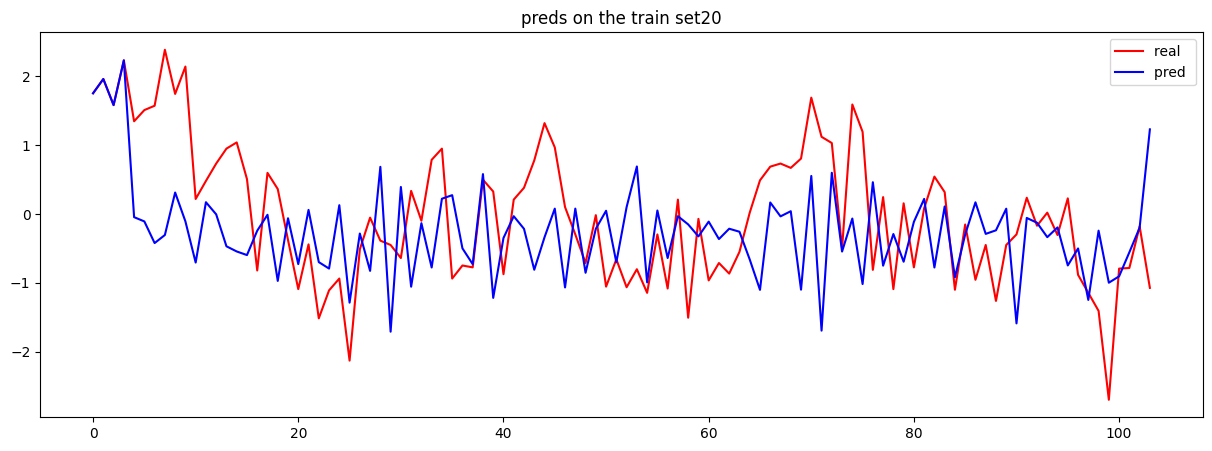

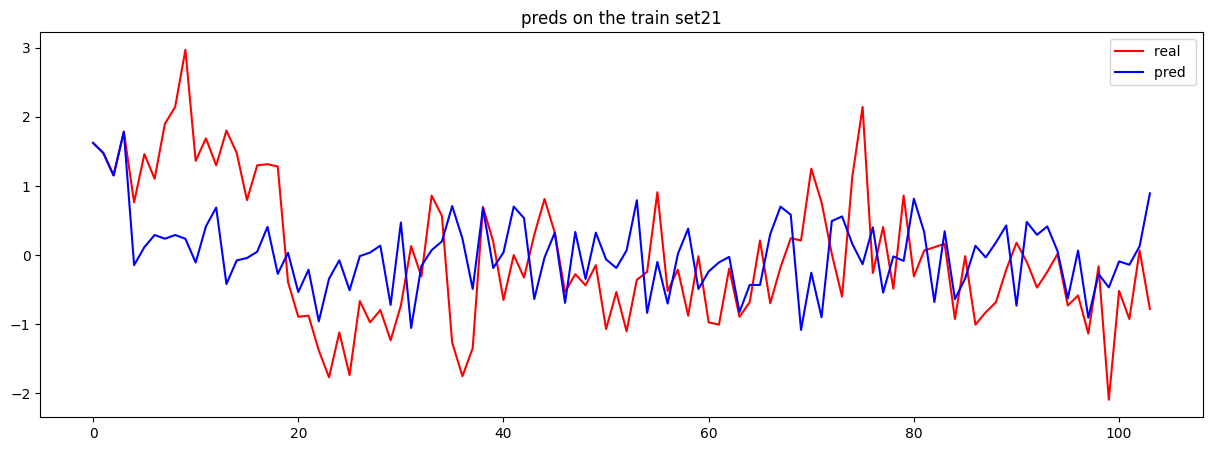

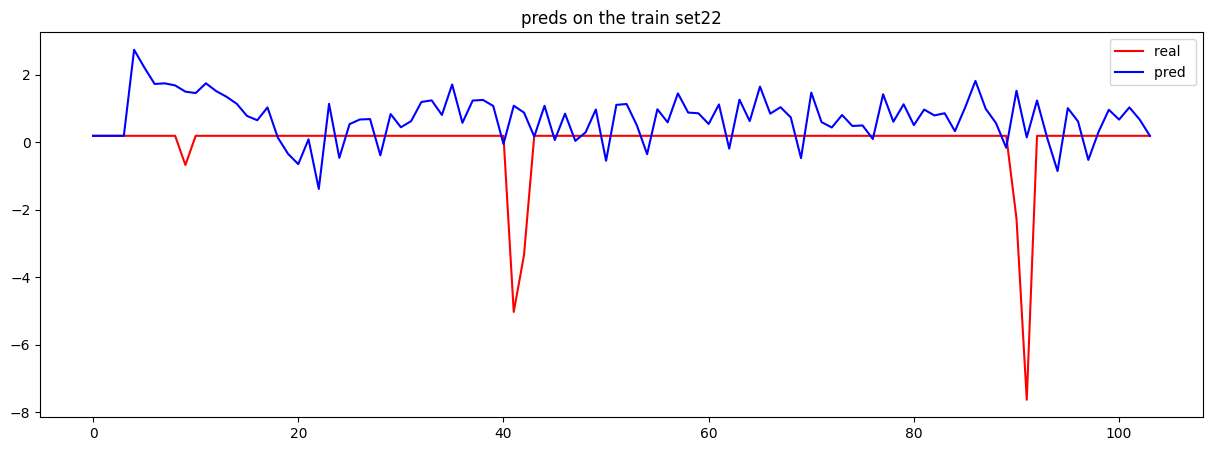

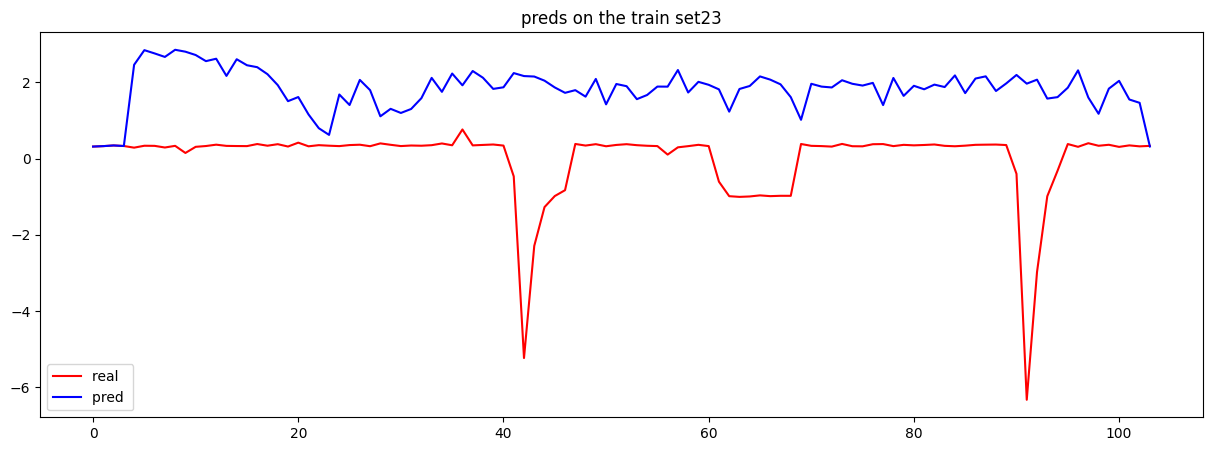

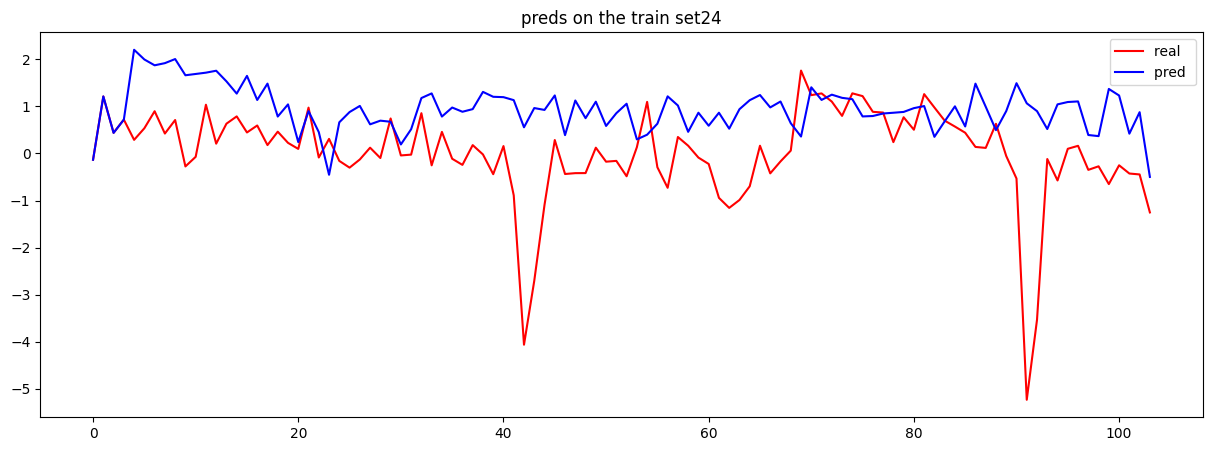

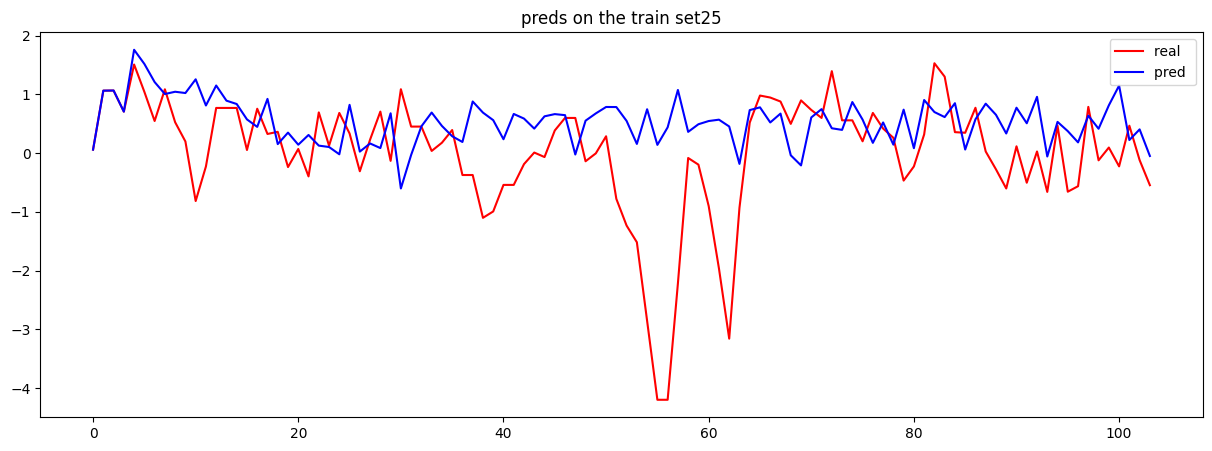

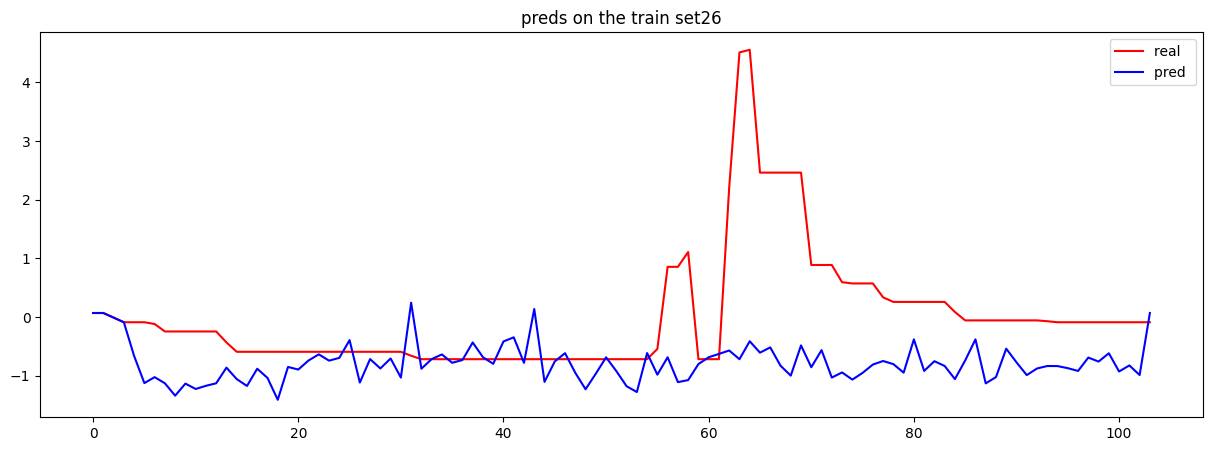

max tokens  14
torch.Size([1, 5, 27])
Test MSE Loss - SI only:  0.17767274379730225
Test MSE Loss - SI only 0-5:  0.08411573618650436
Test MSE Loss - SI only 5-10:  0.2982770800590515
Test MSE Loss - SI only 10-15:  0.21957628428936005
mae, mse, rmse, mape, mspe, rse, corr
(0.31475848, 0.17767274, 0.42151245, 4.0223, 156.87178, 1.014432)
Testing R**2 - SI only:  -0.029072165489196777
Testing R**2 - SI only:  -0.029072165489196777
Testing R**2 - All features:  0.4736529588699341
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0


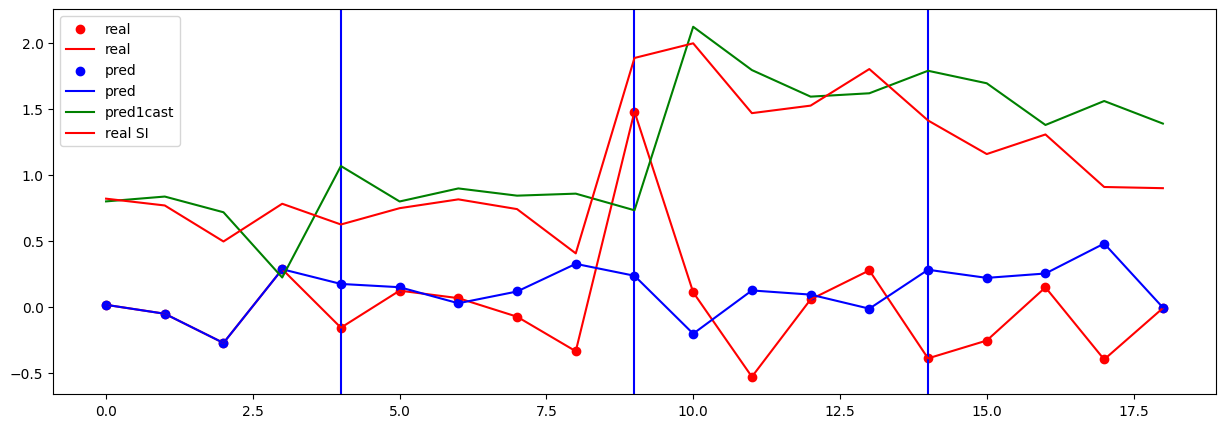

In [28]:

inferenceGPT_obj.the_offset = 0
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( selec_offset = inferenceGPT_obj.the_offset)
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
inferenceGPT_obj.func_zh_infer_on_train_set(si_GPT, history_GPT, x_means, x_standard_devs, data_zh ) 
results_string = inferenceGPT_obj.function_test_rc(  chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs )
inferenceGPT_obj.save_results_to_file( results_string, tsGPT_obj )



## 015 to 030


In [ ]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( selec_offset = inferenceGPT_obj.the_offset)
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc(  chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs )
inferenceGPT_obj.save_results_to_file( results_string, tsGPT_obj )



## 030 to 045


In [ ]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( selec_offset = inferenceGPT_obj.the_offset)
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc(  chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs )
inferenceGPT_obj.save_results_to_file( results_string, tsGPT_obj )



## 045 to 060


In [ ]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( selec_offset = inferenceGPT_obj.the_offset)
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc(  chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs )
inferenceGPT_obj.save_results_to_file( results_string, tsGPT_obj )



## 060 to 075


In [ ]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( selec_offset = inferenceGPT_obj.the_offset)
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc(  chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs )
inferenceGPT_obj.save_results_to_file( results_string, tsGPT_obj )



## 075 to 090


In [ ]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( selec_offset = inferenceGPT_obj.the_offset)
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc(  chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs )
inferenceGPT_obj.save_results_to_file( results_string, tsGPT_obj )



## 090 to 105


In [ ]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( selec_offset = inferenceGPT_obj.the_offset)
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc(  chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs )
inferenceGPT_obj.save_results_to_file( results_string, tsGPT_obj )



## Add the dates ( ??) 


In [29]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )



## Start of the 6 Random Runs



## Run 1


In [32]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  1.4834916591644287
seq length of pred =  15


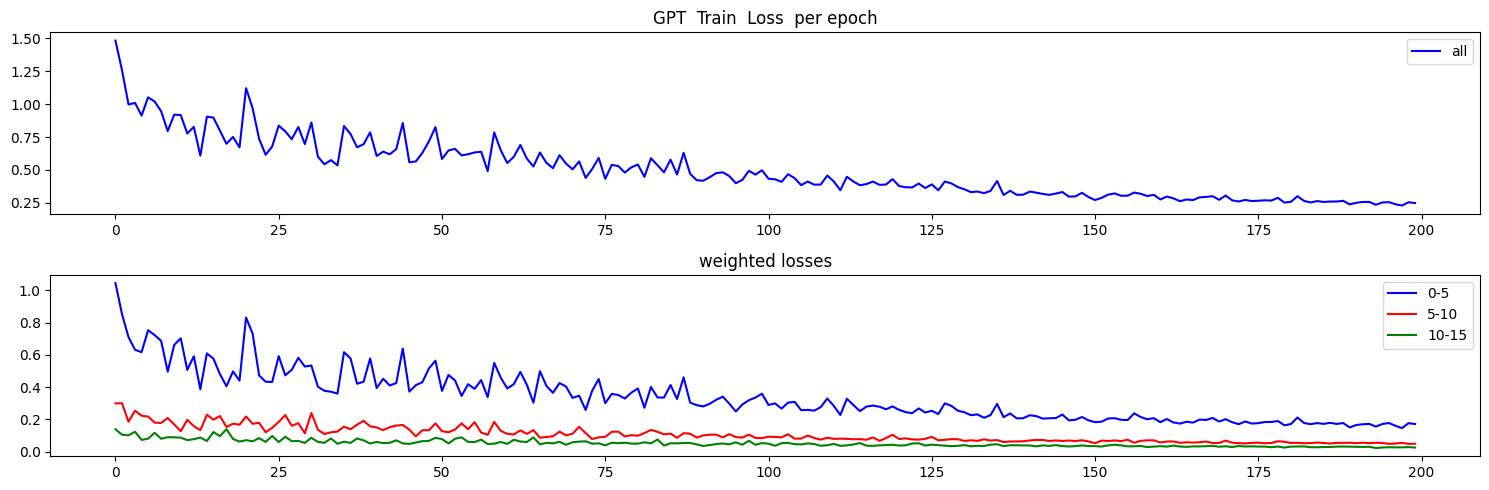

max tokens  14
torch.Size([1, 5, 27])
Test MSE Loss - SI only:  0.01466179359704256
Test MSE Loss - SI only 0-5:  0.016985462978482246
Test MSE Loss - SI only 5-10:  0.013143554329872131
Test MSE Loss - SI only 10-15:  0.013782935217022896
mae, mse, rmse, mape, mspe, rse, corr
(0.096139416, 0.014661795, 0.121085905, 1.4460268, 4.8371835, 1.0363175)
Testing R**2 - SI only:  -0.07395362854003906
Testing R**2 - SI only:  -0.07395362854003906
Testing R**2 - All features:  0.9962235689163208
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0
this ... 0.0


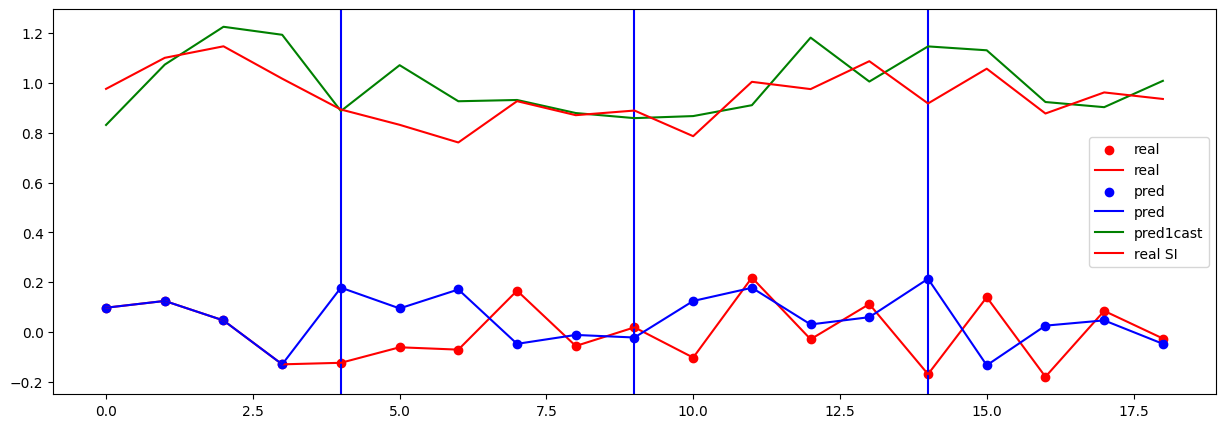

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )
tsGPT_obj.save_file_random_4_runs( 1 , "300to400", results_string )


In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )
tsGPT_obj.save_file_random_4_runs( 1 , "200to400", results_string )


In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )
tsGPT_obj.save_file_random_4_runs( 1 , "100to400", results_string )


In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )
tsGPT_obj.save_file_random_4_runs( 1 , "000to400" , results_string)



## Run2
